In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets

Defaulting to user installation because normal site-packages is not writeable

  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\HP LAPTOP\AppData\Local\Temp\pip-install-dmcql9ly\tensorflow-gpu_77d0828008744aadb1f349a1d0949d63\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
ERROR: Could not build wheels for tensorflow-gpu, which is required to install pyproject.t


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached python_version-0.0.2-py2.py3-none-any.whl (3.4 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu


In [1]:
import tensorflow as tf
gpus=tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    gpus.config.experimental.set_memory_growth(gpu,True)

In [2]:
gpus

[]

In [3]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt 

In [4]:
ds=tfds.load("fashion_mnist",split="train")

In [5]:
ds.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

In [6]:
ex=ds.as_numpy_iterator().next()["image"]
ex.shape

(28, 28, 1)

In [7]:
ds.as_numpy_iterator().next()["label"]

2

In [8]:
import numpy as np

In [9]:
dataiterator=ds.as_numpy_iterator()

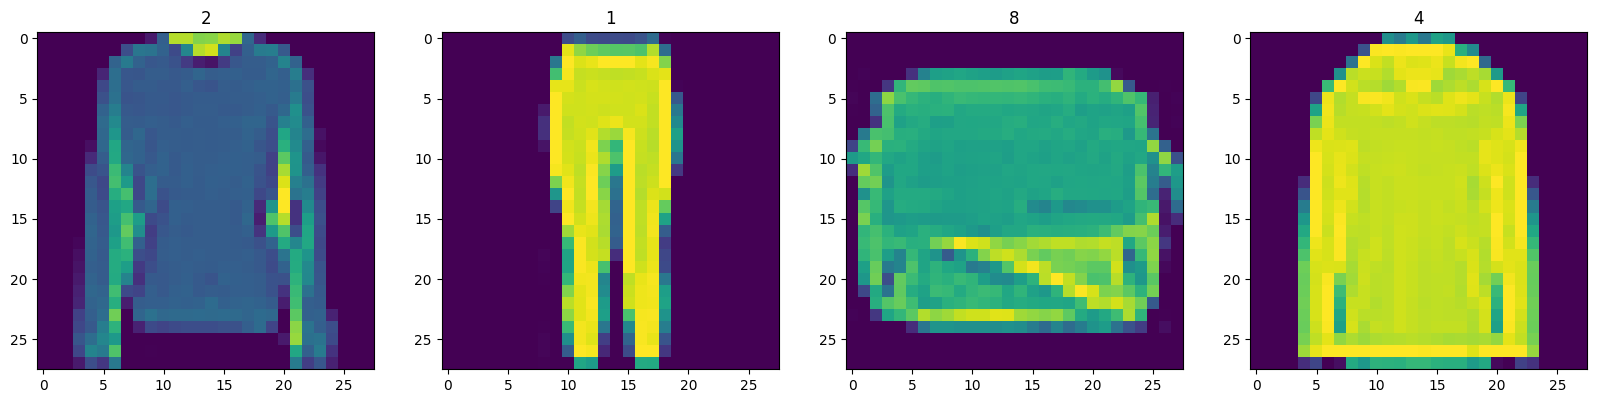

In [10]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    sample=dataiterator.next()
    ax[idx].imshow(np.squeeze(sample["image"]))
    ax[idx].title.set_text(sample["label"])

In [11]:
def scale_images(data):
    data=data["image"]
    return data/255

In [12]:
ds=ds.map(scale_images)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128)
ds=ds.prefetch(64)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

In [14]:
def build_generator():
    model=Sequential()

    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    model.add(UpSampling2D())
    model.add(Conv2D(128,(5,5),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(UpSampling2D())
    model.add(Conv2D(128,(5,5),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,(4,4),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128,(4,4),padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(1,(4,4),padding="same",activation="sigmoid"))

    return model

In [22]:
generator=build_generator()

In [23]:
img=generator.predict(np.random.randn(4,128,1))
img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step


array([[[[0.4995365 ],
         [0.49291724],
         [0.48998573],
         ...,
         [0.49238306],
         [0.4951671 ],
         [0.4948535 ]],

        [[0.5002767 ],
         [0.48616135],
         [0.4854904 ],
         ...,
         [0.49715123],
         [0.4952143 ],
         [0.4912089 ]],

        [[0.49190888],
         [0.48860607],
         [0.48478377],
         ...,
         [0.48997524],
         [0.49374858],
         [0.4877895 ]],

        ...,

        [[0.4935065 ],
         [0.49318963],
         [0.5001396 ],
         ...,
         [0.4959016 ],
         [0.49545693],
         [0.49759418]],

        [[0.4981121 ],
         [0.49541974],
         [0.49721918],
         ...,
         [0.49848053],
         [0.4963359 ],
         [0.49823105]],

        [[0.4993488 ],
         [0.49702612],
         [0.49419153],
         ...,
         [0.49860013],
         [0.49887246],
         [0.49983633]]],


       [[[0.5018054 ],
         [0.49107414],
         [0.49

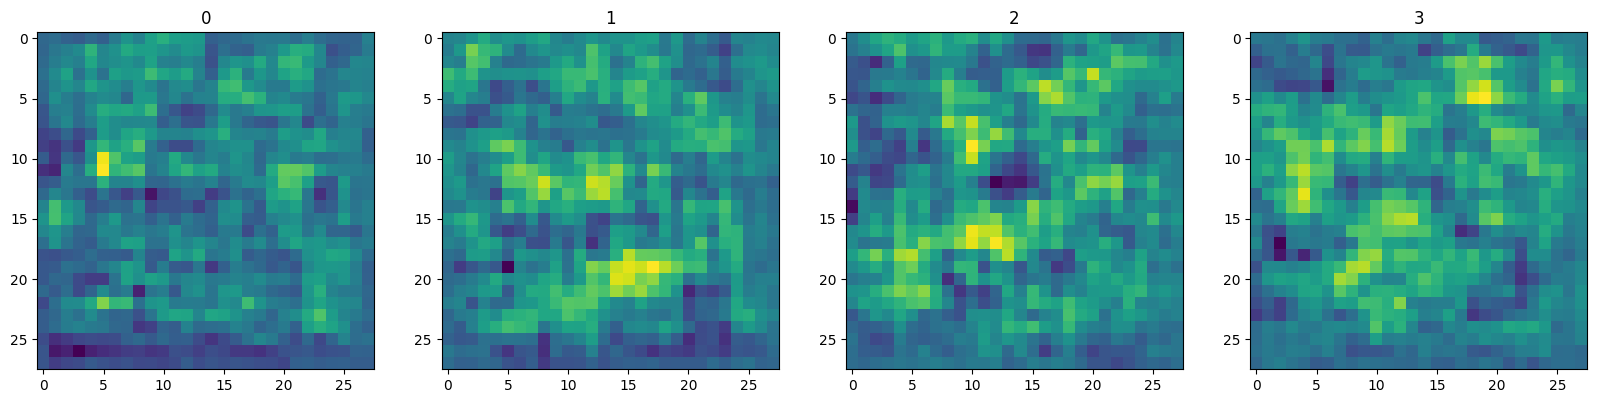

In [17]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img))
    ax[idx].title.set_text(idx)

In [18]:
def build_discriminator(): 
    model = Sequential()
    
    model.add(Conv2D(32, 5, input_shape = (28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, 5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    
    return model 

In [24]:
discriminator = build_discriminator()

In [20]:
img.shape

(28, 28, 1)

In [25]:
discriminator.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


array([[0.49964333],
       [0.49932763],
       [0.4994767 ],
       [0.49946827]], dtype=float32)

In [26]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

In [27]:
g_opt=Adam(0.0001)
d_opt=Adam(0.00001)

g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [28]:
from tensorflow.keras.models import Model


In [29]:
class FashionGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((128, 128, 1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((128,128,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [30]:
fashgan = FashionGAN(generator, discriminator)

In [31]:
fashgan.compile(g_opt, d_opt, g_loss, d_loss)

In [32]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [33]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = array_to_img(generated_images[i])
            img.save(os.path.join('images', f'generated_img_{epoch}_{i}.png'))

In [ ]:
hist = fashgan.fit(ds, epochs=1, callbacks=[ModelMonitor()])

379/469 ━━━━━━━━━━━━━━━━━━━━ 27:33 18s/step - d_loss: 0.4599 - g_loss: 1.0366